In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.io as sio

import scanning_drift_corr.api as sdc

# Read the simulated data

In [2]:
with h5py.File('../data_examples/nonlinear_drift_correction_synthetic_dataset_for_testing.mat', 'r') as f:
    image00deg = np.array(f['image00deg']).T
    image90deg = np.array(f['image90deg']).T
    imageIdeal = np.array(f['imageIdeal']).T

Text(0.5, 1.0, '90 deg')

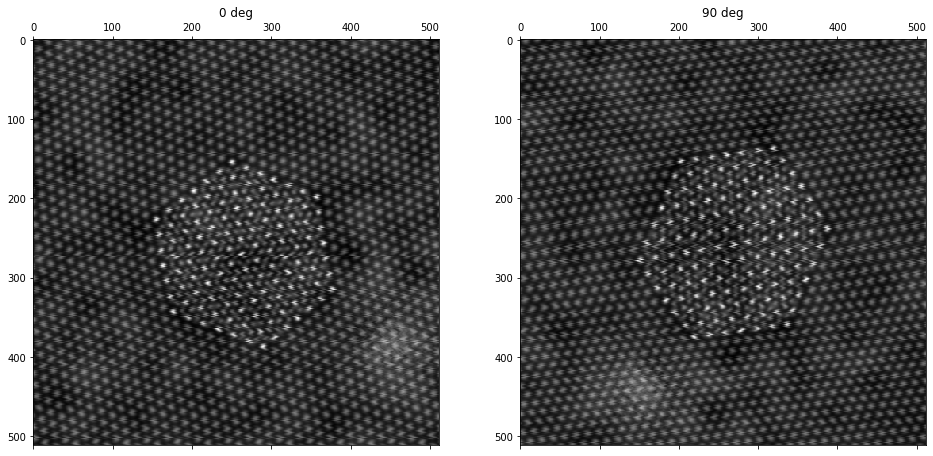

In [3]:
fig, ax = plt.subplots(1,2, figsize=(16,9))
ax[0].matshow(image00deg, cmap='gray')
ax[1].matshow(image90deg, cmap='gray')
ax[0].set_title('0 deg')
ax[1].set_title('90 deg')

# Set the scan direction of the input images

In [4]:
scanAngles = (0, 90)

# Correct linear drift
The function returns the `sMerge` class which contains information for correcting distortion.

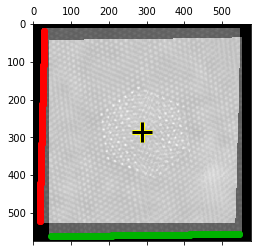

In [5]:
sm = sdc.SPmerge01linear(scanAngles, image00deg, image90deg)

# Correct non-linear drift
A lot of things are happening in the function...




Initial refinement ...
Beginning primary refinement ...
Recomputing images and plotting ...


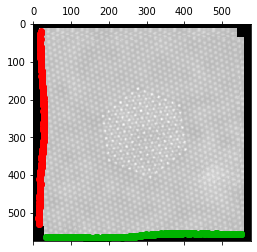

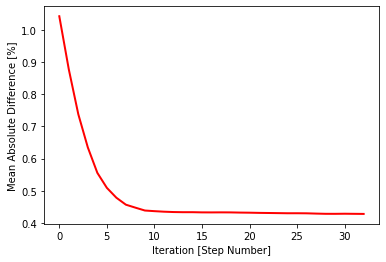

In [6]:
sm = sdc.SPmerge02(sm, refineMaxSteps=32, initialRefineSteps=8)

# Generate the final image

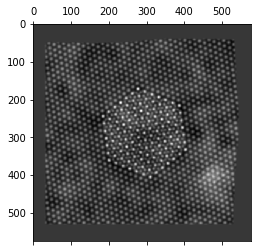

In [7]:
imageFinal, signalArray, densityArray = sdc.SPmerge03(sm)

# Compare with the ideal image

Text(0.5, 1.0, 'Ideal image')

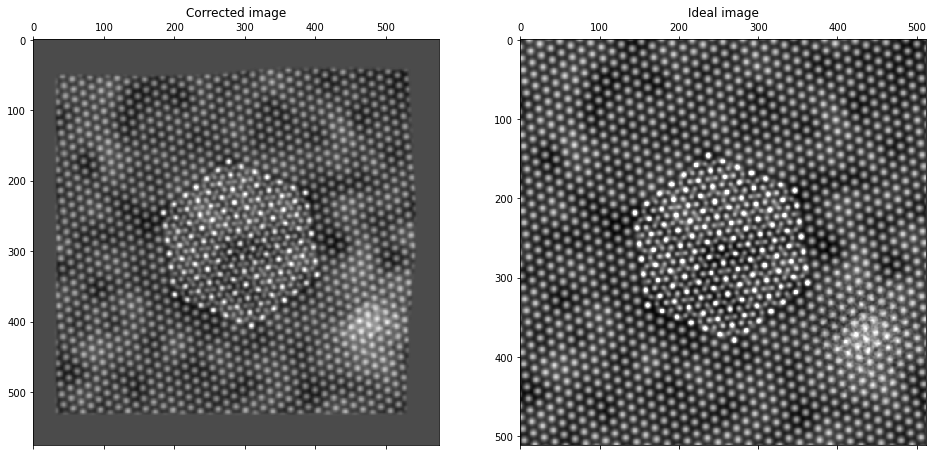

In [8]:
fig, ax = plt.subplots(1,2, figsize=(16,9))
ax[0].matshow(imageFinal, cmap='gray', vmin=5.5, vmax=7)
ax[1].matshow(imageIdeal, cmap='gray', vmin=5.5, vmax=7)
ax[0].set_title('Corrected image')
ax[1].set_title('Ideal image')

# Estimated images on each scan

Text(0.5, 1.0, 'Estimated 0 deg image')

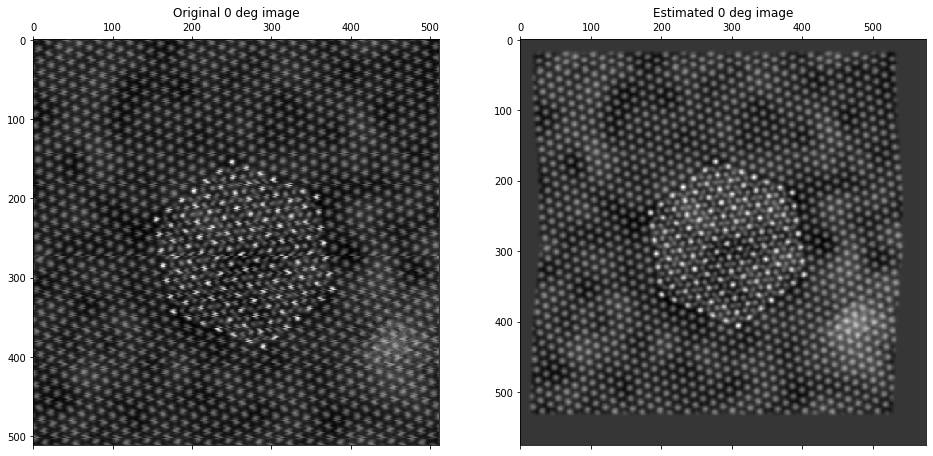

In [9]:
fig, ax = plt.subplots(1,2, figsize=(16,9))

ax[0].matshow(image00deg, cmap='gray')
ax[1].matshow(signalArray[0,...], cmap='gray')
ax[0].set_title('Original 0 deg image')
ax[1].set_title('Estimated 0 deg image')

Text(0.5, 1.0, 'Estimated 90 deg image at 0 deg')

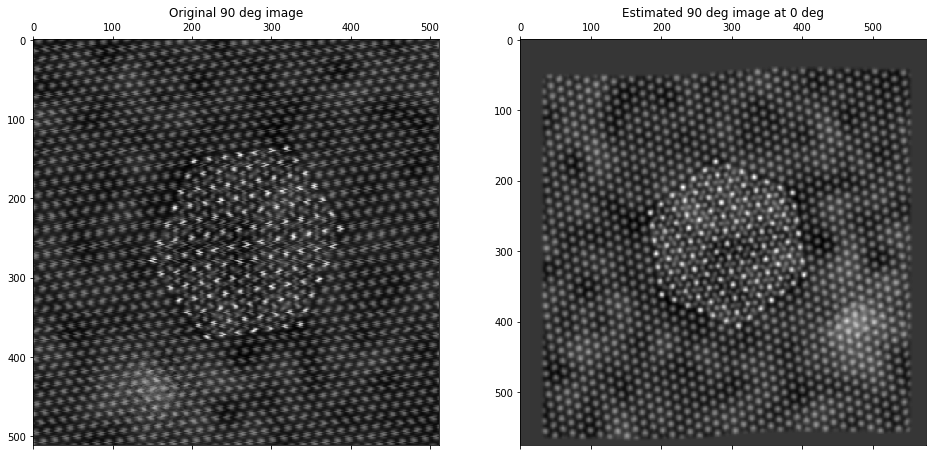

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,9))

ax[0].matshow(image90deg, cmap='gray')
ax[1].matshow(signalArray[1,...], cmap='gray')
ax[0].set_title('Original 90 deg image')
ax[1].set_title('Estimated 90 deg image at 0 deg')

# Estimated density on each scan

Text(0.5, 1.0, 'Estimated denstiy at 90 deg')

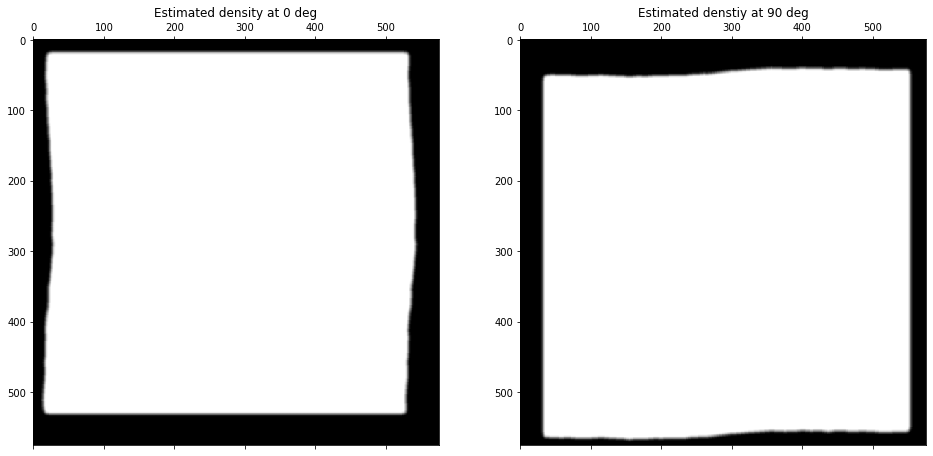

In [11]:
fig, ax = plt.subplots(1,2, figsize=(16,9))
ax[0].matshow(densityArray[0,...], cmap='gray')
ax[1].matshow(densityArray[1,...], cmap='gray')
ax[0].set_title('Estimated density at 0 deg')
ax[1].set_title('Estimated denstiy at 90 deg')